# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings

warnings.filterwarnings("ignore")

Primeiro passo é carregar os dados armazenados nos bancos de dados.  
Os dados ja estavam separados em X (variaveis independentes) e y (variavel resposta) e tambem em treino e teste

In [319]:
y_ = pd.read_csv('./train/y_train.txt')
y_valid = pd.read_csv('./test/y_test.txt')
y_valid

,5
0,5
1,5
2,5
3,5
4,5
...,...
2941,2
2942,2
2943,2
2944,2


In [302]:
df_var = pd.read_csv('features.txt', header=None, delim_whitespace=True)
features = df_var[1].tolist()

df_sub = pd.read_csv('./train/subject_train.txt', header=None, delim_whitespace=True)

X_ = pd.read_csv('./train/X_train.txt', header=None, delim_whitespace=True)
X_ = X_.drop(X_.index[-1])
X_.columns = features
X_['individuo'] = df_sub[0]
X_.set_index(['individuo'], inplace=True)
X_.index.name = 'individuo'
X_ = X_.reset_index().set_index(['individuo', X_.index])
X_

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
individuo individuo                                                            
1         1                   0.288585          -0.020294          -0.132905   
          1                   0.278419          -0.016411          -0.123520   
          1                   0.279653          -0.019467          -0.113462   
          1                   0.279174          -0.026201          -0.123283   
          1                   0.276629          -0.016570          -0.115362   
...                                ...                ...                ...   
30        30                  0.237966          -0.001088          -0.148326   
          30                  0.299665          -0.057193          -0.181233   
          30                  0.273853          -0.007749          -0.147468   
          30                  0.273387          -0.017011          -0.045022   
          30                  0.289654          -0.018843          -0.158281   

                     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
individuo individuo                                                         
1         1                 -0.995279         -0.983111         -0.913526   
          1                 -0.998245         -0.975300         -0.960322   
          1                 -0.995380         -0.967187         -0.978944   
          1                 -0.996091         -0.983403         -0.990675   
          1                 -0.998139         -0.980817         -0.990482   
...                               ...               ...               ...   
30        30                -0.218949         -0.012927          0.170019   
          30                -0.195387          0.039905          0.077078   
          30                -0.235309          0.004816          0.059280   
          30                -0.218218         -0.103822          0.274533   
          30                -0.219139         -0.111412          0.268893   

                     tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
individuo individuo                                                         
1         1                 -0.995112         -0.983185         -0.923527   
          1                 -0.998807         -0.974914         -0.957686   
          1                 -0.996520         -0.963668         -0.977469   
          1                 -0.997099         -0.982750         -0.989302   
          1                 -0.998321         -0.979672         -0.990441   
...                               ...               ...               ...   
30        30                -0.309599         -0.041392          0.207454   
          30                -0.282301          0.043616          0.060410   
          30                -0.322552         -0.029456          0.080585   
          30                -0.304515         -0.098913          0.332584   
          30                -0.310487         -0.068200          0.319473   

                     tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
individuo individuo                    ...                                    
1         1                 -0.934724  ...                        -0.074323   
          1                 -0.943068  ...                         0.158075   
          1                 -0.938692  ...                         0.414503   
          1                 -0.938692  ...                         0.404573   
          1                 -0.942469  ...                         0.087753   
...                               ...  ...                              ...   
30        30                 0.210795  ...                        -0.028664   
          30                 0.210795  ...                        -0.070157   
          30                 0.117440  ...                         0.165259   
          30                 0.043999  ...                         0.195034   
          30                

In [321]:
df_sub_test = pd.read_csv('./test/subject_test.txt', header=None, delim_whitespace=True)

X_valid = pd.read_csv('./test/X_test.txt', header=None, delim_whitespace=True)
X_valid = X_valid.drop(X_valid.index[-1])
X_valid.columns = features
X_valid['individuo'] = df_sub_test[0]
X_valid.set_index(['individuo'], inplace=True)
X_valid.index.name = 'individuo'
X_valid = X_valid.reset_index().set_index(['individuo', X_valid.index])
X_valid

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
individuo individuo                                                            
2         2                   0.257178          -0.023285          -0.014654   
          2                   0.286027          -0.013163          -0.119083   
          2                   0.275485          -0.026050          -0.118152   
          2                   0.270298          -0.032614          -0.117520   
          2                   0.274833          -0.027848          -0.129527   
...                                ...                ...                ...   
24        24                  0.192275          -0.033643          -0.105949   
          24                  0.310155          -0.053391          -0.099109   
          24                  0.363385          -0.039214          -0.105915   
          24                  0.349966           0.030077          -0.115788   
          24                  0.237594           0.018467          -0.096499   

                     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
individuo individuo                                                         
2         2                 -0.938404         -0.920091         -0.667683   
          2                 -0.975415         -0.967458         -0.944958   
          2                 -0.993819         -0.969926         -0.962748   
          2                 -0.994743         -0.973268         -0.967091   
          2                 -0.993852         -0.967445         -0.978295   
...                               ...               ...               ...   
24        24                -0.354841         -0.092504         -0.312910   
          24                -0.287866         -0.140589         -0.215088   
          24                -0.305388          0.028148         -0.196373   
          24                -0.329638         -0.042143         -0.250181   
          24                -0.323114         -0.229775         -0.207574   

                     tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
individuo individuo                                                         
2         2                 -0.952501         -0.925249         -0.674302   
          2                 -0.986799         -0.968401         -0.945823   
          2                 -0.994403         -0.970735         -0.963483   
          2                 -0.995274         -0.974471         -0.968897   
          2                 -0.994111         -0.965953         -0.977346   
...                               ...               ...               ...   
24        24                -0.433579         -0.088741         -0.336060   
          24                -0.356083         -0.148775         -0.232057   
          24                -0.373540         -0.030036         -0.270237   
          24                -0.388017         -0.133257         -0.347029   
          24                -0.392380         -0.279610         -0.289477   

                     tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
individuo individuo                    ...                                    
2         2                 -0.894088  ...                         0.071645   
          2                 -0.894088  ...                        -0.401189   
          2                 -0.939260  ...                         0.062891   
          2                 -0.938610  ...                         0.116695   
          2                 -0.938610  ...                        -0.121711   
...                               ...  ...                              ...   
24        24                -0.041624  ...                         0.158728   
          24                 0.185361  ...                         0.074472   
          24                 0.185361  ...                         0.101859   
          24                 0.007471  ...                        -0.066249   
          24                

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

Segundo passo é separar os dados de validação.  
Optei por usar o test como o validation e separar com o split a base de teste.

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=.25, random_state=224589)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

Em seguida cirei uma arvore de decisao para encontrar as tres melhores variaveis para gerar o modelo.

In [325]:
clf = DecisionTreeClassifier(max_depth=4, random_state=264588)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=264588)

In [327]:
importancias = clf.feature_importances_

importancias_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importancias
})

importancias_df = importancias_df.sort_values(by='importance', ascending=False)

print(importancias_df)

                             feature  importance
52               tGravityAcc-min()-X    0.283848
389  fBodyAccJerk-bandsEnergy()-1,16    0.263993
559             angle(Y,gravityMean)    0.159628
504                fBodyAccMag-mad()    0.126401
69         tGravityAcc-arCoeff()-Y,1    0.120701
..                               ...         ...
185      tBodyGyroJerk-arCoeff()-X,1    0.000000
184        tBodyGyroJerk-entropy()-Z    0.000000
183        tBodyGyroJerk-entropy()-Y    0.000000
182        tBodyGyroJerk-entropy()-X    0.000000
560             angle(Z,gravityMean)    0.000000

[561 rows x 2 columns]


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

Após encontrar as variaveis comecei a construção do modelo.  
Construi uma arvore de decisão optando por usar o post-pruning, assim podendo encontrar o melhor ccp_alpha para uma modelagem mais concreta

In [347]:
%%time

X_train = X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]
X_valid = X_valid[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]
X_test = X_test[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']]

CPU times: total: 0 ns
Wall time: 23 ms


In [331]:
clf = DecisionTreeClassifier(random_state=224589)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pacote = {'ccp_alphas': ccp_alphas, 'impurezas': impurities}
pacote

{'ccp_alphas': array([0.00000000e+00, 1.20462976e-04, 1.20926295e-04, 1.44567046e-04,
        1.51157869e-04, 1.51157869e-04, 1.51157869e-04, 1.51157869e-04,
        1.51157869e-04, 1.55476666e-04, 1.55476666e-04, 1.55476666e-04,
        1.55476666e-04, 1.58323872e-04, 1.61235061e-04, 1.61235061e-04,
        1.63250499e-04, 1.63250499e-04, 1.64899494e-04, 1.66273656e-04,
        1.66273656e-04, 1.66273656e-04, 1.68433054e-04, 1.68433054e-04,
        1.68433054e-04, 1.68433054e-04, 1.69296814e-04, 1.70052603e-04,
        1.70719476e-04, 1.71312252e-04, 1.71842630e-04, 1.71842630e-04,
        1.72319971e-04, 1.72751851e-04, 1.72751851e-04, 1.73144468e-04,
        1.73144468e-04, 1.73386968e-04, 1.73502946e-04, 1.73502946e-04,
        1.73831550e-04, 1.74501236e-04, 1.75721023e-04, 1.75721023e-04,
        1.75721023e-04, 1.75892793e-04, 1.76054460e-04, 1.76206888e-04,
        1.76206888e-04, 1.76350847e-04, 1.76350847e-04, 1.76487026e-04,
        1.76579875e-04, 1.76616037e-04, 1.76738432

In [333]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=0)
    clf.fit(X_train, y_train)
    clfs.append(clf)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

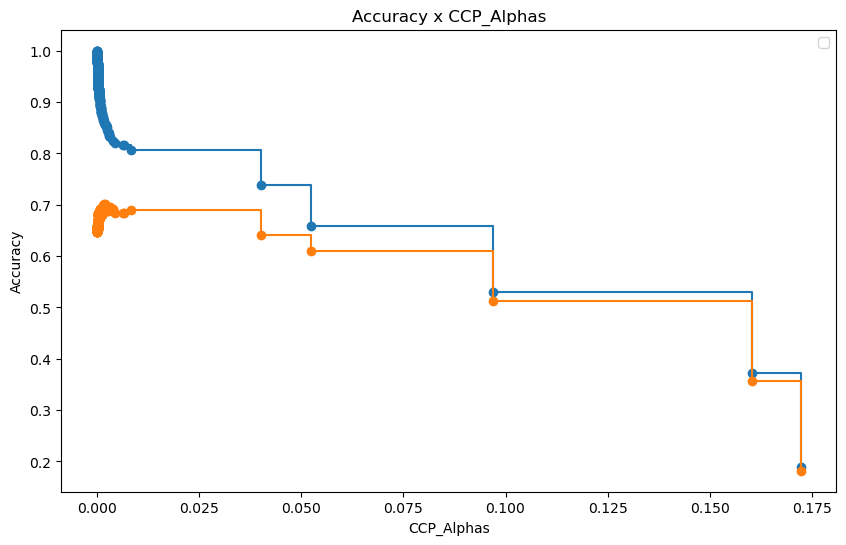

In [335]:
train_score = [clf.score(X_train, y_train) for clf in clfs]
valid_score = [clf.score(X_valid, y_valid) for clf in clfs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_score, marker='o', drawstyle='steps-post')
plt.plot(ccp_alphas, valid_score, marker='o', drawstyle='steps-post')
plt.title('Accuracy x CCP_Alphas')
plt.xlabel('CCP_Alphas')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

In [337]:
maior_acuracia = len(valid_score) - valid_score[::-1].index(max(valid_score)) - 1
melhor_arvore = clfs[maior_acuracia]
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.0020211795853702294, random_state=0)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Nessa ultima etapa avaliamos a acuracia do validation e dos dados de teste.  

In [339]:
max_accuracy = max(valid_score)
max_accuracy

0.7016293279022403

In [349]:
acuracia_test = melhor_arvore.score(X_test, y_test)
print(acuracia_test)

0.8394994559303591
